***Full Name: Larbi Djilali
Motivation: This project helps to capture students list and  calification and  generate automatically the percentage of approved and no approved students using Bar graphs. It van be usefull for schools and unversities uses. 



In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
new_lista_alumnos=[]


***Option Selection
This function helps the user  to select the option of fillfuled the student list and their califiactions, which are HomeWork, Exam 1, and Exam 2.  


In [2]:
def selcetOption():
    print("1. Fill Student List.")
    print("2. Exit.")
    option=input("Select option: ")
    return option

***if the user select option 1, the following function is excuted. This function ask user to give the student ID, Name, Homework , Exam 1, and Exam 2 califications. 

In [3]:
def createList():
    Id=input("Matricula del alumno: ") 
    Name=input("Nombre del alumno: ")
    while True:
        HomeWork=input("Calificacion de Tareas del alumno: ")
        if HomeWork.isnumeric():
                     break
        else:
                     print('El valor usado no es numero')
    while True:
        Exam1=input("Calificacion del EXA1 del alumno: ")
        if Exam1.isnumeric():
                     break
        else:
                     print('El valor usado no es numero')                 
    while True:
        Exam2=input("Calificacion del EXA2 del alumno: ")
        if Exam2.isnumeric():
                     break
        else:
                     print('El valor usado no es numero')
                     
    lista_alumnos={'Id': Id ,
                    'Name':Name,
                    'HomeWork':HomeWork,
                    'Exam1':Exam1,
                    'Exam2':Exam2
                           }
    return lista_alumnos


***This function is used to creat a list of student with entred information in *.xlsx file. 

In [4]:
def createArchivo(lista_alumnos):
    df = pd.DataFrame(data=lista_alumnos,columns=['Id','Name','HomeWork','Exam1','Exam2'])
    writer = pd.ExcelWriter('lista_alumnos.xlsx', engine='xlsxwriter')
    df.to_excel(writer, sheet_name='page1', encoding='utf8', index=False)
    writer.save()

    

***This function is used to read the created *.xlsx file and go through it to calculate the final califiaction, which  presents the sum of (homeWork+Exam1+Exam2)/3  for each student and add a column with this  final calification value.

In [5]:
def finalCalif():
    df = pd.read_excel('lista_alumnos.xlsx')
    print(df )
    sum=0
    avrg=[]
    for index, row in df.iterrows():
        sum=(int(row['HomeWork'])+int(row['Exam1'])+int(row['Exam2']))/3
        avrg.append(round(sum,2))
    #print(avrg)
    n=len(avrg)
    df["FinalCali"]=avrg
    print(df )
    return df


***This function is used to obtain the statiscal values for approved a no approved students considering the percentage value. 

In [6]:
def statisricsCalcul(df):
    n=len(df["FinalCali"])
    student_app=0
    per_app=0
    student_noapp=0
    per_noapp=0
    for index, row in df.iterrows():
        if (int(row["FinalCali"]))>=7:
            student_app=student_app+1
        else:
            student_noapp=student_noapp+1
    per_app=round((student_app/n)*100,2)
    per_noapp=round((student_noapp/n)*100,2)
    print(per_app,per_noapp) 
    return per_app, per_noapp

***This function is used to plot the barGhraph of the calculated percentages. 

In [7]:
def plotStatics(results):

    x = np.array(["student_app", "student_noapp"])
    y = np.array([results[0], results[1]])

    plt.bar(x[0],y[0],color='blue',label = "Approved")
    plt.bar(x[1],y[1],color='red',label = "not Approved")
    plt.xlabel('Students')
    plt.ylabel('Perecentage (%)')
    plt.legend()
    plt.show()

In [8]:
while True:
    option=selcetOption()
    if option=='1':
        lista_alumnos=createList()
        new_lista_alumnos.append(list(lista_alumnos.values()))
        print(new_lista_alumnos)
             
    elif option=='2':
        break
    else:
        print("Option not valid")
        


1. Fill Student List.
2. Exit.
Select option: m
Option not valid
1. Fill Student List.
2. Exit.
Select option: 1
Matricula del alumno: fg
Nombre del alumno: Lrbi
Calificacion de Tareas del alumno: 22
Calificacion del EXA1 del alumno: 12
Calificacion del EXA2 del alumno: 12
[['fg', 'Lrbi', '22', '12', '12']]
1. Fill Student List.
2. Exit.
Select option: 2


In [9]:
createArchivo(new_lista_alumnos) 


In [10]:
df=finalCalif()


   Id  Name  HomeWork  Exam1  Exam2
0  fg  Lrbi        22     12     12
   Id  Name  HomeWork  Exam1  Exam2  FinalCali
0  fg  Lrbi        22     12     12      15.33


In [12]:
results=statisricsCalcul(df)


100.0 0.0


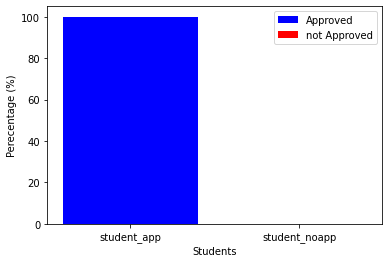

In [13]:
plotStatics(results)